# NetworkX

## What is it?
NetworkX is a Python 3 module for creating web diagrams (or graphs, as they are called in NetworkX tutorials), or charts of relations. These relationships may be rendered with weights and directions.

This module has more structured ways of drawing plots that might be useful for flow-charts, but I think it's particularly useful for visualizing things like chemical networks.

## Definitions of Terms
- **Edge**: a line or arrow representing a relationship between two or more things.
- **Node**: a hub or vertex where 1+ edges or relationships meet; the things that are connected by relationships.
- **Graph**: the set of all desired edges and nodes (does not actually have to be rendered, but hard to visualize if you don't)
- **Neighbor**: a node next to the node of interest
- **Degree**: the number of edges connected to the given node (*not* synonymous with degrees of separation)
There are more terms to cover (density, adjacency, directed graphs, etc), but a lot of them are easier to show than describe. 

## Creating a Graph
Now let's create a simple graph. To make this something other than complete gibberish that nobody would thing to connect, I'm going to borrow the Simplified Water Network (SWaN, from Schmalzl et al. 2014 https://ui.adsabs.harvard.edu/abs/2014A%26A...572A..81S/abstract), which includes the following chemical reactions:
1. O(g) --> H2O(s) (basically O is doubly hydrogenated instantly upon freezing onto the grain)
1. H2O(s) --> H2O(g)
1. H2O(g) --> H2O(s)
1. H2O(g) + photon --> O(g)

We'll start with a basic graph just to see what the relationship web looks like.

Both nodes and edges can be added one at a time, in bulk from iterable containers (lists, dicts, etc), or exported from an existing graph. I'll demonstrate all.

**Nodes** in particular can be any **hashable**(https://docs.python.org/3/glossary.html#term-hashable) object: a number, string, image, xml object...even another graph! The hashable criteria excludes lists, dictionaries, and *None*.

In [1]:
import networkx as nx
G = nx.Graph()

In [2]:
G.add_node('O(g)')
G.add_nodes_from('H2O'+s for s in ['(g)','(s)'])
DiG = nx.DiGraph()
DiG.add_nodes_from(G)

I'll set DiG aside for when I demonstrate directed graphs. For now, let me just note that, **when adding elements to one graph from another**, the **syntax for nodes** is as shown above, but the **syntax for edges** would be **DiG.add_edges_from(G.*edges*)**.

**Edges** are specified individually by the start and end nodes, or in bulk using a series of 2-tuples (or 3 tuples where the 3rd term is an attribute dict; I'll get to those later). If you add a single edge from, say, a 2-tuple that was assigned to a variable, you must unpack the 2-tuple with a leading asterisk.

In [3]:
G.add_edge('O(g)', 'H2O(s)')
G.add_edges_from([ ( 'H2O(s)', 'H2O(g)' ), ( 'H2O(g)' , 'O(g)' ) ])
freezeout = ('H2O(g)', 'H2O(s)')
G.add_edge(*freezeout)

All of the **add_** functions listed above have complimentary **remove_** functions with the same syntax. If you added nodes/edges by copying the nodes/edges from a different graph, as long as the nodes/edges from the source graph all exist in the derivative graph, you can use the source graph as an argument of **remove_edges/nodes_from()** to remove those elements from the derivative graph.

*Nodes do NOT need to be specified before adding edges—you can just add the edges and the nodes will be added automatically.* Let's say we want to add the following:
- H(g) --> H2(s)
- H2(s) --> H2O(s)

In [4]:
G.add_edges_from([ ( 'H(g)', 'H2(s)' ), ( 'H2(s)' , 'H2O(s)' ) ])
print(G.nodes.data())

[('O(g)', {}), ('H2O(g)', {}), ('H2O(s)', {}), ('H(g)', {}), ('H2(s)', {})]


## Graph Attributes
Graphs have some attributes accessible with .attr notation, like a python array. For a basic, non-directed graph, the most important attributes available for inspection are:
- **G.nodes**: read-only view of the nodes
- **G.edges[node]**: read-only view of the edges adjacent to *node*; if '[node]' is omitted, all edges will be listed
- **G.adj[node]**: read-only view of which nodes are adjacent to *node*; can also be printed with **list(G.neighbors(node))**
- **G.degree[node]**: read-only view of the number of edges connecting to *node*
- **G.number_of_nodes()**: prints the total number of nodes in the graph
- **G.number_of_edges()**: prints the total number of edges in the graph

The first 4 of the above print set-like read-only views of the requested values. If you want any of these views packaged into a usable container, e.g. a list, you just have to wrap the above commands in **list()** or another datatype converter function. For example, if you want a list of the nodes, you can just use list(G.nodes).
**G.edges** and **G.degree** also take lists or other containers of nodes (as long as the container is not itself a node) if you want only the edges connected to a specific subset of nodes or counts thereof, respectively.

Let me demonstrate **G.adj** and **G.neighbors** since they don't give the most intuitive results.

In [5]:
print(G.neighbors('O(g)'), list(G.neighbors('O(g)')))

<dict_keyiterator object at 0x00000260D802FF48> ['H2O(s)', 'H2O(g)']


In [6]:
G.adj['O(g)']

AtlasView({'H2O(s)': {}, 'H2O(g)': {}})

Note that **G.neighbors()** produces an iterator object instead of a view object over the nodes neighboring the one in (), while **G.adj[]** reports neighboring nodes as keys to empty dictionaries.

### Edge and Node attributes
Both nodes and edges are associated with implicit dictionaries that can be used to add attributes and other details, like color. Aside from 'weight' or 'color', these are not pre-existing keys: you can add any key-value pair you want as long as the keys are strings and the values are strings or numbers. To access a specific attribute that you know the name of, you just access it like a dictionary entry (similar to how you set it). To view the attributes you've added (e.g. to check that you've added a given attribute to every node or edge, or remind yourself what attributes you've assigned), just add **.items()** after G.nodes or G.edges, and convert the whole thing to a list (or another compatible container).

We'll go ahead and draw the graph while we're at it so you can see what some of our attributes look like and how to invoke them (because making the attributes matplotlib-readable is not as trivial as one would hope).

In [7]:
G.nodes['O(g)']['color']='red'
G.nodes['H2O(s)']['color']='dodgerblue'
G.nodes['H2O(g)']['color']='skyblue'
G.nodes['H2(s)']['color']='orchid'
G.nodes['H(g)']['color']='pink'
G.edges['H2O(s)', 'H2O(g)']['weight']=2.0
G.edges['H2O(g)', 'O(g)']['rxn_type']='photodissociation'
G.edges['O(g)','H2O(s)']['rxn_type']='adsorption + hydrogenation'

print(list(G.nodes.items()),'\n', list(G.edges.items()))

[('O(g)', {'color': 'red'}), ('H2O(g)', {'color': 'skyblue'}), ('H2O(s)', {'color': 'dodgerblue'}), ('H(g)', {'color': 'pink'}), ('H2(s)', {'color': 'orchid'})] 
 [(('O(g)', 'H2O(s)'), {'rxn_type': 'adsorption + hydrogenation'}), (('O(g)', 'H2O(g)'), {'rxn_type': 'photodissociation'}), (('H2O(g)', 'H2O(s)'), {'weight': 2.0}), (('H2O(s)', 'H2(s)'), {}), (('H(g)', 'H2(s)'), {})]


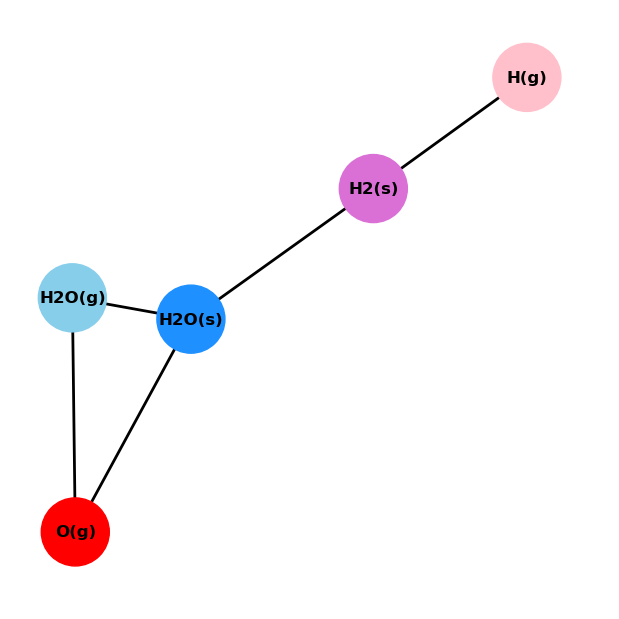

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
options = {'with_labels':True, 'font_weight':'bold', 'width':2}
nx.draw(G,node_color=[t[1] for t in G.nodes.data('color')], node_size=2400, **options)
plt.axis('off')
# networkx likes to draw exterior nodes really close to the margins by default
# these next 3 lines are to prevent the graphic from being cut off
axis = plt.gca()
axis.set_xlim([1.2*x for x in axis.get_xlim()])
axis.set_ylim([1.2*y for y in axis.get_ylim()])
plt.show()

## Analyzing Graphs
Now that we have a visual, we can more easily discuss some of the analytical and statistical algorithms that NetworkX provides. The Algorithms index, https://networkx.org/documentation/stable/reference/algorithms/index.html, easily contains several hundred separate functions. Many of these appear to be nested in **networkx.algorithms** or more deeply, but most of them are imported automatically; for a module like **networkx.algorithms.approximation**, the documentation will tell you if you need to import the module separately. I'm only going to demonstrate a couple functions for now, but may include more later as we learn to handle more complicated graphs.

A graph of this shape is a good one for demonstrating some stuff to do with connectivity and degrees of separation. It is common for the output to either be a dictionary or be readily convertible to a dictionary. It's always a good idea to check the form of the returns since they can change depending on which or how many (kw)args you use.

In [9]:
print(nx.triangles(G, 'O(g)')) # returns number of triangles that include a the given node(s) as a vertex
print(nx.triangles(G)) # if no node or >1 node specified, returns dict of {node: no. of triangles containing node}

1
{'O(g)': 1, 'H2O(g)': 1, 'H2O(s)': 1, 'H(g)': 0, 'H2(s)': 0}


In [10]:
print(sorted([d,n] for n, d in G.degree())) #recall, deg(node) = no. of edges connected to node
print(nx.clustering(G)) # clustering coefficient = 2*no. triangles containing node / (deg(node)*(deg(node)-1))

[[1, 'H(g)'], [2, 'H2(s)'], [2, 'H2O(g)'], [2, 'O(g)'], [3, 'H2O(s)']]
{'O(g)': 1.0, 'H2O(g)': 1.0, 'H2O(s)': 0.3333333333333333, 'H(g)': 0, 'H2(s)': 0}


In [11]:
shortpath=dict(nx.all_pairs_shortest_path(G)) # nested dict of shortest both-ends-inclusive paths between all pairs of nodes
print('path from H2O(g) to H2(s): ',shortpath['H2O(g)']['H2(s)'],'\n')

# this print statement gets rid of null paths ("paths" where start = end and length = 0)
[print(['{}-->{}: {}'.format(k,ki,vi) for ki,vi in v.items() if ki!=k],'\n') for k,v in shortpath.items()]
# I think I know why this outputs a list of 5 Nones at the end but idk how to get rid of them

print(nx.efficiency(G, 'H2O(s)', 'H(g)')) # efficiency = 1/(shortest connecting path length)
# length of any single edge = 1 unless otherwise specified

path from H2O(g) to H2(s):  ['H2O(g)', 'H2O(s)', 'H2(s)'] 

["O(g)-->H2O(s): ['O(g)', 'H2O(s)']", "O(g)-->H2O(g): ['O(g)', 'H2O(g)']", "O(g)-->H2(s): ['O(g)', 'H2O(s)', 'H2(s)']", "O(g)-->H(g): ['O(g)', 'H2O(s)', 'H2(s)', 'H(g)']"] 

["H2O(g)-->H2O(s): ['H2O(g)', 'H2O(s)']", "H2O(g)-->O(g): ['H2O(g)', 'O(g)']", "H2O(g)-->H2(s): ['H2O(g)', 'H2O(s)', 'H2(s)']", "H2O(g)-->H(g): ['H2O(g)', 'H2O(s)', 'H2(s)', 'H(g)']"] 

["H2O(s)-->O(g): ['H2O(s)', 'O(g)']", "H2O(s)-->H2O(g): ['H2O(s)', 'H2O(g)']", "H2O(s)-->H2(s): ['H2O(s)', 'H2(s)']", "H2O(s)-->H(g): ['H2O(s)', 'H2(s)', 'H(g)']"] 

["H(g)-->H2(s): ['H(g)', 'H2(s)']", "H(g)-->H2O(s): ['H(g)', 'H2(s)', 'H2O(s)']", "H(g)-->O(g): ['H(g)', 'H2(s)', 'H2O(s)', 'O(g)']", "H(g)-->H2O(g): ['H(g)', 'H2(s)', 'H2O(s)', 'H2O(g)']"] 

["H2(s)-->H(g): ['H2(s)', 'H(g)']", "H2(s)-->H2O(s): ['H2(s)', 'H2O(s)']", "H2(s)-->O(g): ['H2(s)', 'H2O(s)', 'O(g)']", "H2(s)-->H2O(g): ['H2(s)', 'H2O(s)', 'H2O(g)']"] 

0.5


Speaking of paths, did anyone notice earlier that **list(G.edges.items())** reports 5 edges even though we've added a total of 6? Because this is not a directed graph, the edge representing H2O(s) --> H2O(g) is indistinguishable from the edge representing the reverse reaction. Which version was preserved? Let's look at the edge list again:

In [12]:
G.edges

EdgeView([('O(g)', 'H2O(s)'), ('O(g)', 'H2O(g)'), ('H2O(g)', 'H2O(s)'), ('H2O(s)', 'H2(s)'), ('H(g)', 'H2(s)')])

We added the reaction H2O(g) --> H2O(s) after its reverse reaction, and that's what appears in our list of edges, but look at some of the other edges, e.g. the one representing H2O(g) --> O(g). They're in the wrong order! **Edges in regular (undirected) graphs may not preserve the order of the nodes used to add them.** Odds are that only the most recent specification of a given edge is preserved because the default behavior of mutable objects in Python is to update, but we'd never know if that wasn't the case. The nodes used to define any edge are stored in whichever order uses less memory because our choice of graph told the computer that it didn't have to remember the order of the nodes.

What if you want the order of the nodes to matter, e.g. to indicate the directions in which a web of chemical reactions proceeds?

## Directed Graphs
Directed graphs are just graphs where the order of the endpoints used to specify an edge matters and can be used to indicate that one node proceeds from another. 

Remember that graph we initialized as DiG = nx.DiGraph()? We already added the nodes, but now lets give it some edges. Recall that our simple network consists of these reactions:
1. O(g) --> H2O(s)
1. H2O(s) --> H2O(g)
1. H2O(g) --> H2O(s)
1. H2O(g) + photon --> O(g)

For this exercise, I'm just going to use the ones that go in sequence, so we're going to temporarily ignore the 3rd reaction on that list.

It'd be nice if we could just import from G, but G didn't store the nodes in the order that we want. While we're adding edges the hard way, I'll go ahead and show you how to add attributes at the same time as you're adding edges.

In [13]:
DiG.add_edges_from([ ('O(g)', 'H2O(s)'), ( 'H2O(s)', 'H2O(g)', {'weight':2.0} ), ( 'H2O(g)' , 'O(g)' ) ], color='green')
DiG.edges.data('color')

OutEdgeDataView([('O(g)', 'H2O(s)', 'green'), ('H2O(g)', 'O(g)', 'green'), ('H2O(s)', 'H2O(g)', 'green')])

These methods of adding attributes also work for nodes, using the same syntax.

The nodes for individual edges now indicate that they're pointing in the right direction. That said, the edges aren't listed in the order in which we added them, which was supposed to reflect the logical progression. Why is that?

If you were to scroll all the way back to back the top when I defined the nodes for G and then exported them to DiG, you'd notice that the list comprehension statement that I used to add the two phases of H2O put H2O(g) before H2O(s). *If nodes are added before their associated edges* (instead of using the addition of edges to add nodes as we did with H(g) and H2(s)), *then the nodes are sorted by the order of addition, and the edges are sorted for print by the first node in the n-tuple.*

Does this matter? Well, not for display purposes.

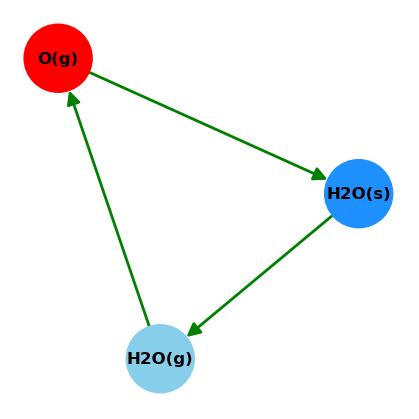

In [14]:
DiG.nodes['O(g)']['color']='red'
DiG.nodes['H2O(s)']['color']='dodgerblue'
DiG.nodes['H2O(g)']['color']='skyblue'

options['arrowsize']=20 # this size seems to work better than the tiny default
# as of networkx 2.1 there is also now an arrowstyle kwarg

plt.figure(figsize=(4,4))
nx.draw(DiG,node_color=[t[1] for t in DiG.nodes.data('color')], edge_color=[t[2] for t in DiG.edges.data('color')],
        node_size=2400, **options)
plt.axis('off')
axis = plt.gca()
axis.set_xlim([1.1*x for x in axis.get_xlim()])
axis.set_ylim([1.1*y for y in axis.get_ylim()])
plt.show()

It even added the arrows for us :)

But if the order of the edges in the view object bothers you, you'll have to start over.

In [15]:
DiG.clear()
DiG.add_edges_from([('O(g)','H2O(s)', {'rxn_type':'adsorption', 'weight':0.25}),
                    ('H2O(s)','H2O(g)', {'rxn_type':'desorption', 'weight':0.5}),
                    ('H2O(g)','O(g)', {'rxn_type':'photo-dissociation', 'weight':0.25})])
DiG.nodes['O(g)']['color']='red'
DiG.nodes['H2O(s)']['color']='dodgerblue'
DiG.nodes['H2O(g)']['color']='skyblue'

print(DiG.nodes)
print(DiG.edges)

['O(g)', 'H2O(s)', 'H2O(g)']
[('O(g)', 'H2O(s)'), ('H2O(s)', 'H2O(g)'), ('H2O(g)', 'O(g)')]


The DiGraph class has extra methods and attributes specific to directed edges. As with most other methods of examining graph contents, some of these functions output iterators or view objects instead of numbers or lists, and must be enclosed in **list()** or some other data type converter to view the contents. Every function listed below with "in" in the name has a complimentary "out" function with the same syntax.
- **DiG.in_degree()**: reports the integer number of edges pointing *toward* each node in (), or *to* every node if () are empty, or a view of the nodes and the edges pointing to them if () are omitted. *Note: If exactly 1 node is provided in (), the result will be an integer, so list(DiG.in_degree) will raise an error.
- **DiG.in_edges()**: returns an iterator of edges pointing *toward* the node in (), or all edges in no particular order if () are omitted or left empty.
- **DiG.sucessors()**: returns an iterator of the node(s) at the opposite end of any single edge(s) leading *away from* the node(s) input into ().
- **DiG.predecessors()**:returns an iterator of the node(s) at the opposite end of any single edge(s) leading *toward* the node(s) input into ().

In [16]:
DiG.in_degree

InDegreeView({'O(g)': 1, 'H2O(s)': 1, 'H2O(g)': 1})

In [17]:
DiG.in_edges()

InEdgeView([('H2O(g)', 'O(g)'), ('O(g)', 'H2O(s)'), ('H2O(s)', 'H2O(g)')])

In [18]:
print(list(DiG.predecessors('H2O(s)')), '\n', list(DiG.successors('H2O(s)')))

['O(g)'] 
 ['H2O(g)']


Some of the functions defined earlier for undirected graphs are also suitable for directed graphs, but not all, and the ones that are defined for both types of graph don't always work intuitively. DiG.degree() will return the sum of in_degree() and out_degree(), but DiG.neighbors() and DiG.adj[] *only report successors*.

In [19]:
print(list(DiG.successors('H2O(s)')), '\n', list(DiG.neighbors('H2O(s)')), '\n',  list(DiG.adj['H2O(s)']))

['H2O(g)'] 
 ['H2O(g)'] 
 ['H2O(g)']


My best guess as to why neighbors() and adj() only report successors is to avoid a recursion loop when used on the types of graphs we'll cover next, which allow multiple connections between the same two nodes.

If you want to see all neighbors of a given node, you can either concatenate the predecessors and successors, or convert a view of **DiGraph** to **Graph** using **nx.to_undirected()** (there is also a **nx.to_directed()** function for the opposite operation). **to_undirected()** and its inverse return a modified copy of the input graph; the original will only be modified if you set the result equal to the name of the input graph. These functions can be used to generate a new graph.

In [20]:
print(list(nx.to_undirected(DiG).adj['H2O(s)']))
#quick proof that DiG itself wasn't changed
print(list(DiG.predecessors('H2O(s)')))

['H2O(g)', 'O(g)']
['O(g)']


We still haven't tackled the issue of how to handle having two edges going in opposite directions between the same two nodes. Luckily, NetworkX has solutions for this too. To be frank, if you use this package to visualize chemical networks, the following types of graph are probably the only ones you'll care to remember.

## Multi-Graphs and Multi-Di-Graphs
NetworkX offers two graph classes, **MultiGraph** and **MultiDiGraph**, both of which allow you to keep track of multiple connections between the same two nodes, and the latter of which also keeps track of their directions. I'm just going to focus on the latter since it's the most complicated and most useful for visualizing chemistry.

Most of what we want is already included in our DiGraph, so we'll just export that graph and only have to add the last edge. Unfortunately, attributes like 'color' don't seem to transfer.

In [21]:
mud = nx.MultiDiGraph()
mud.add_nodes_from(DiG) #I only included this one to try to import the node attributes too. Doesn't work
mud.add_edges_from(DiG.edges)
mud.add_edge(*freezeout)
print(list(mud.nodes.items()),'\n', list(mud.edges.items()))

[('O(g)', {}), ('H2O(s)', {}), ('H2O(g)', {})] 
 [(('O(g)', 'H2O(s)', 0), {}), (('H2O(s)', 'H2O(g)', 0), {}), (('H2O(g)', 'O(g)', 0), {}), (('H2O(g)', 'H2O(s)', 0), {})]


Note the zeroes in the list of edges. Those are tags to distinguish two edges spanning the same 2 nodes in the same direction, which default to 0 or the lowest integer not already in use. If we decided to add another H2O(g) --> O(g) reaction, e.g. to represent cosmic ray dissociation, the additional edge will be assigned a 1 in the third tuple entry

In [22]:
mud.add_edge('H2O(g)', 'O(g)')
print(list(mud.edges.items()))

[(('O(g)', 'H2O(s)', 0), {}), (('H2O(s)', 'H2O(g)', 0), {}), (('H2O(g)', 'O(g)', 0), {}), (('H2O(g)', 'O(g)', 1), {}), (('H2O(g)', 'H2O(s)', 0), {})]


Let's see if it still assigns a key if we re-add it with a distinguishing attribute.

In [23]:
mud.remove_edge('H2O(g)', 'O(g)',1)
mud.add_edge('H2O(g)', 'O(g)',weight=0.5)
print(list(mud.edges.items()))

[(('O(g)', 'H2O(s)', 0), {}), (('H2O(s)', 'H2O(g)', 0), {}), (('H2O(g)', 'O(g)', 0), {}), (('H2O(g)', 'O(g)', 1), {'weight': 0.5}), (('H2O(g)', 'H2O(s)', 0), {})]


This is good. It means we don't have to figure out up front how to keep identical edges distinct. We can figure that out later.

In [24]:
mud.remove_edge('H2O(g)', 'O(g)',1)

We don't especially need weights, but if we happen to know the rates of these reactions we're looking at, it won't hurt to encode them (spoiler: reaction rates vary with environment, so take these numbers with a truckload of salt).

Let's say we know the following:
- O2 freezes out onto dust grains about 5x faster than H2O,
- H2O freezes out 60x faster than it sublimates, and
- H2O is dissociated at about the same rate as it sublimates.

Our reactions would be weighted 300, 60, 1, and 1, which would scale to fractional weights of 0.829, 0.166, 0.003, and 0.003. Here's how to access the edges and set the weights (*note that the numerical keys are required*):

In [25]:
mud.edges['O(g)','H2O(s)',0]['weight']=0.829
mud.edges['H2O(g)','H2O(s)',0]['weight']=0.166
mud.edges['H2O(s)','H2O(g)',0]['weight']=0.003
mud.edges['H2O(g)','O(g)',0]['weight']=0.003

Now let's see how matplotlib handles the two edges we put between the same two nodes.

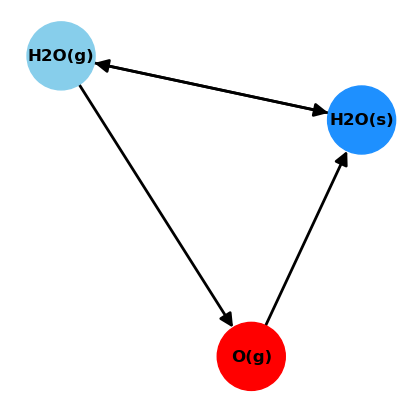

In [26]:
mud.nodes['O(g)']['color']='red'
mud.nodes['H2O(s)']['color']='dodgerblue'
mud.nodes['H2O(g)']['color']='skyblue'

plt.figure(figsize=(4,4))
nx.draw(mud,node_color=[t[1] for t in mud.nodes.data('color')], edge_color='black',
        node_size=2400, **options)
plt.axis('off')
axis = plt.gca()
axis.set_xlim([1.1*x for x in axis.get_xlim()])
axis.set_ylim([1.1*y for y in axis.get_ylim()])
plt.show()

### Plotting tips
There are arrowheads on both ends of the edge between solid and gaseous H2O. It's a good default, but not ideal if you want to show the two edges as having different weights or other properties, or if you want to label them. Fortunately, **nx.draw()** has a kwarg for that, too: *connectionstyle*, which is actually a matplotlib patch (details at https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.ConnectionStyle.html).

Since this fix will let us view all edges separately, we might as well add some edge labels. However, adding them to the plot will require us to give our nodes fixed positions. Fortunately, that is a thing we can either do manually or using any of the commands under the *Graph Layout* su
bheading in https://networkx.org/documentation/stable/reference/drawing.html. Manual positions can be assigned by adding a position attribute to the nodes the same way we added "color", and then extracting them for the 'pos' kwarg in **nx.draw()** and **nx.draw_networkx_edge_labels** (you could actually draw something like a trail map with NetworkX like this). However, for our little 3-point graph, a circular layout is probably best.

In [27]:
pos = nx.circular_layout(mud)

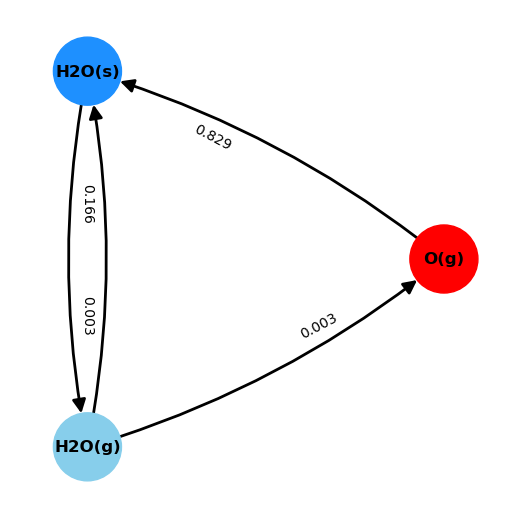

In [28]:
plt.figure(figsize=(5,5))
nx.draw(mud, pos=pos, node_color=[t[1] for t in mud.nodes.data('color')], edge_color='black',
        node_size=2400, connectionstyle = 'arc3, rad = 0.1', **options)
nx.draw_networkx_edge_labels(mud,pos, edge_labels={(t[0],t[1]):t[2] for t in list(mud.edges.data('weight'))},
                             label_pos=0.35)
plt.axis('off')
axis = plt.gca()
axis.set_xlim([1.1*x for x in axis.get_xlim()])
axis.set_ylim([1.1*y for y in axis.get_ylim()])
plt.show()

Just a warning, **nx.draw_networkx_edge_labels()** has a couple of very frustrating caveats: edge label positions cannot be set individually in the same invocation, or offset vertically from the edge. Keep your labels short and use the horizontal offset to separate different labels for the same node.

## File I/O
There are a large number of possible file formats for writing graphs to file or reading them in, documented here: https://networkx.org/documentation/stable/reference/readwrite/index.html TBH I'm not familiar with most of these formats because many of them require knowledge of another language (e.g. LEDA is a C++ class and GraphML is XML-based). I'll just go over the simple, human-readble types.

If you don't care to interface with any other programming languages or view the material outside of Python, the easiest thing to do is just pickle the graph with **networkx.write_gpickle(G, *path*)**. When you want to open it again, you can just unpickle it with **networkx.read(*path*)**. I'm not going to spend any more time on that approach because it's trivial.

If you want text files that you can at least sort of read, there are 3 possible formats you can use:
- An **Edge List** (edgelist), where for each line, the first two columns are start and end nodes and any subsequent columns can be attributes or dicts of attributes (most intuitive, but can't include isolated nodes)
- An **Adjacency List** (adjlist), where for each line, the first column is a node and all subsequence columns are nodes that are connected to the first (does not handle any node or edge attributes)
- A **Multiline Adjacency List** (multiline_adjlist), where lines are grouped such that the first line is a node and a degree and subsequent lines are connecting nodes followed by optional edge attributes (*documentation doesn't specify the form those attributes should take, so I would assume the best format is the dictionary of edge attributes allowed for an edge list*); the next line with a node and a degree starts a new adjacency group.

Each of these formats (X) have their own **read_Xlist(), write_Xlist(), parse_Xlist(),** and **generate_Xlist()** functions. (Parse here just means to read something that's already been loaded from a file or built some other way, and generate just lets you see the input before you write it out.) For edgelists, there's also **read/write_weighted_edgelist()** where each line is 3 columns and the 3rd column is a numeric weight.

My example file, *SRxnEdgeList.txt*, is an example edge list file with weights and colors. Let's load it. I'll use **read_edgelist()** and not the weighted version because weights aren't the only extra data.

In [29]:
smud = nx.read_edgelist('SRxnEdgeList.txt', nodetype=str, create_using=nx.MultiDiGraph())
print(nx.number_of_nodes(smud), nx.number_of_edges(smud))

30 67


That's a big graph! Let's assign some node properties so it'll be more readable when we plot it. (There's a way to store both edge and node properties in an XML file and load it with NetworkX's associated GraphML modules, but I haven't had time to figure that out yet.)

## Realistic Plotting Example

If you didn't know why the numbers to specify the size of the nodes were so large, it's because they literally just use matplotlib scatter markers. That'll come in handy now.

In [30]:
for node in smud.nodes:
    if '(s)' in node:
        smud.nodes[node]['shape']='H'
    elif '+' in node:
        smud.nodes[node]['shape']='D'
    else:
        smud.nodes[node]['shape']='o'
    if 'SO' in node:
        smud.nodes[node]['color']='tab:red'
    elif 'CS' in node:
        smud.nodes[node]['color']='tab:orange' if 'OCS' in node else 'tab:green'
    elif 'NS' in node:
        smud.nodes[node]['color']='tab:blue'
    else:
        smud.nodes[node]['color']='gold'

It also turns out that controlling the shape of the nodes requires us to plot the nodes and edges separately, which is tedious, but not that hard. But that means even if we weren't worried before about the density of the plot and how the data will be positioned, we have to now. As you may have noticed, **nx.draw()** doesn't tend to give repeating results unless the *pos* kwarg is specified.

When you use **nx.draw()**, the default layout is called a spring layout, which positions nodes using a "force-directed" graph drawing algorithm to try to minimize edge crossings and keep edges similar in length. You'd think that would be ideal, but let me just show you what that gives us.

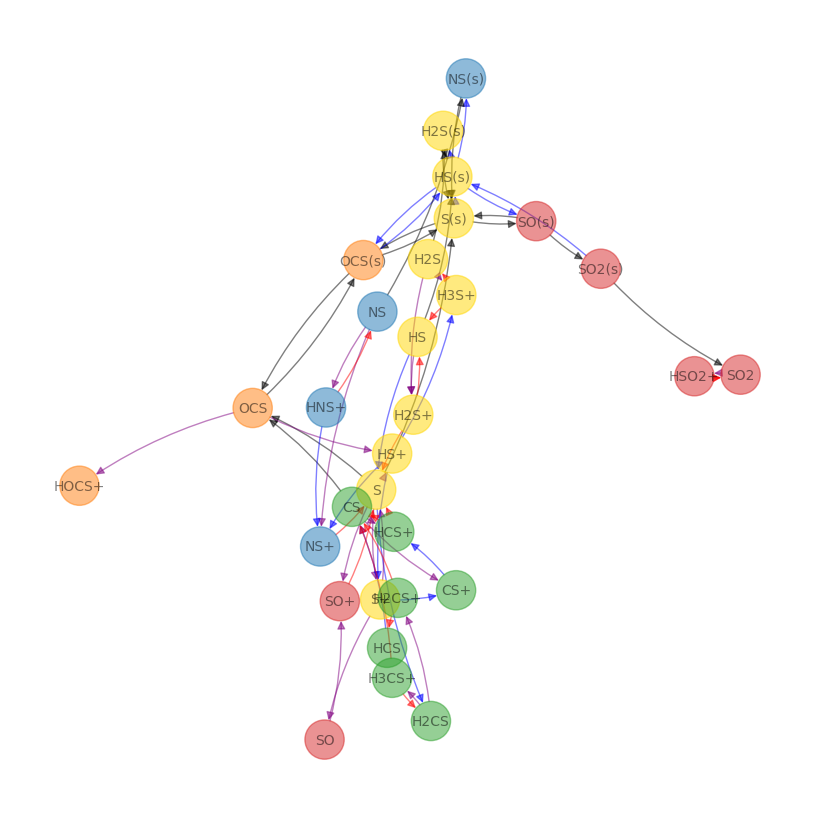

In [38]:
plt.figure(figsize=(8,8))
options = {'with_labels':True, 'width':1, 'arrowsize':12, 'font_size':10}
nx.draw(smud, node_color=[t[1] for t in smud.nodes.data('color')], alpha=0.5,
        edge_color=[t[2] for t in list(smud.edges.data('color'))], node_size=800,
        connectionstyle = 'arc3, rad = 0.1', **options)
#plt.axis('off')
#axis = plt.gca()
#axis.set_xlim([1.05*x for x in axis.get_xlim()])
#axis.set_ylim([1.05*y for y in axis.get_ylim()])
plt.show()

Clearly the spring algorithm isn't giving us a very readable plot. We'll have to use one of the layout setting programs indexed here: https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout. It's not obvious which one will work, so we'll have to try several.

**nx.spring_layout()** uses the Fruchterman-Reingold force-directed algorithm, but there's also the Kamada-Kawai force-directed algorithm encoded in **nx.kamada_kawai_layout()**. Other non-random possibilities include **nx.multipartite_layout()**, which arranges nodes in series of straight lines; **nx.spectral_layout()**, which positions nodes using the eigenvectors of the graph's Lapacian; and good old **nx.circular_layout()**, which positions all the nodes along a circle so they don't overlap. Let's see if any of them are better, and start trying to incorporate the changes of node shape while we're at it. (Another annoyance: the kwarg *node_shape* cannot be a sequence. We have to invoke it for each different set separately.)

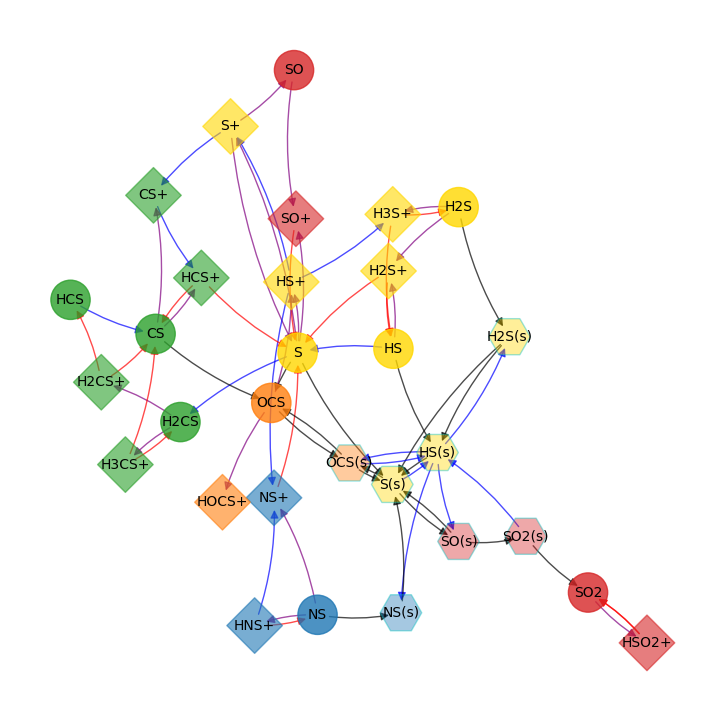

In [78]:
pos = nx.kamada_kawai_layout(smud)
#pos = nx.spectral_layout(smud)
#for node in smud.nodes:
#    smud.nodes[node]['subset_key']=smud.nodes[node]['shape']+smud.nodes[node]['color'].replace('tab:','')
#pos = nx.multipartite_layout(smud,subset_key='subset_key')
#pos = nx.circular_layout(smud)

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)

neutrals = [node for node in smud.nodes if not any(s in node for s in ['(s)','+'])]
nx.draw_networkx_nodes(smud, pos, ax=ax, nodelist=[node for node in smud.nodes if '(s)' in node], node_size=900, alpha=0.4,
                       node_color=[t[1] for t in smud.nodes.data('color') if '(s)' in t[0]], node_shape='H', edgecolors='c')
nx.draw_networkx_nodes(smud, pos, ax=ax, nodelist=[node for node in smud.nodes if '+' in node], node_size=800, alpha=0.6,
                       node_color=[t[1] for t in smud.nodes.data('color') if '+' in t[0]], node_shape='D')
nx.draw_networkx_nodes(smud, pos, ax=ax, nodelist=neutrals, node_size=800, alpha=0.8,
                       node_color=[t[1] for t in smud.nodes.data('color') if t[0] in neutrals])
nx.draw_networkx_edges(smud, pos, ax=ax, edge_color=[t[2] for t in list(smud.edges.data('color'))], arrows=True,
                       connectionstyle = 'arc3, rad = 0.1', arrowsize=12, alpha=0.7)
nx.draw_networkx_labels(smud, pos, ax=ax, font_size=10, font_family='sans-serif')
plt.axis('off')
plt.show()

So, Kamada-Kawai was better, spectral was a lot worse, multipartite requires a key that is currently giving me an error I don't understand, and circular is, well...circular.

I'm going to end here with a note that NetworkX has a HUGE gallery of plots with source code for many different types of graphs and applications: https://networkx.org/documentation/stable/auto_examples/index.html What I just demonstrated was just one application among a countless diversity.